# pandas Foundations

## Chapter 1: Data ingestion & inspection

### Review of pandas DataFrames

#### pandas DataFrames
* tabular data structure with rows & columns
* Example: DataFrame of Apple Stock data

#### Indexes and columns
* `type(df)`
* `df.shape`
* `df.index`

#### Slicing
* `df.iloc[:5,:]`
* `df.iloc[-5:,:]`

#### head() and tail()
* `df.head()`
* `df.tail()`

#### info()
* `df.info()`

#### Broadcasting
* Assigning scalar value to column slice broadbasts value to each row.
* `df.iloc[::3, -1] = np.nan`

#### Series
* `low = df['Low']`
* `type(low)`

### Building DataFrames from scratch

#### DataFrames from CSV files

In [1]:
import pandas as pd
users = pd.read_csv('datasets/users.csv', index_col=0)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


#### DataFrames from dict (1)

In [2]:
import pandas as pd
data = {'weekday': ['Sun', 'Sun', 'Mon', 'Mon'],
        'city': ['Austin', 'Dallas', 'Austin', 'Dallas'],
        'visitors': [139, 237, 326, 456],
        'signups': [7, 12, 3, 5]}
users = pd.DataFrame(data)
users

,weekday,city,visitors,signups
0,Sun,Austin,139,7
1,Sun,Dallas,237,12
2,Mon,Austin,326,3
3,Mon,Dallas,456,5


#### DataFrames from dict (2)

In [3]:
import pandas as pd
cities = ['Austin', 'Dallas', 'Austin', 'Dallas']
signups = [7, 12, 3, 5]
visitors = [139, 237, 326, 456]
weekdays = ['Sun', 'Sun', 'Mon', 'Mon']
list_labels = ['city', 'signups', 'visitors', 'weekday']
list_cols = [cities, signups, visitors, weekdays]
zipped = list(zip(list_labels, list_cols))
zipped

[('city', ['Austin', 'Dallas', 'Austin', 'Dallas']),
 ('signups', [7, 12, 3, 5]),
 ('visitors', [139, 237, 326, 456]),
 ('weekday', ['Sun', 'Sun', 'Mon', 'Mon'])]

In [4]:
data = dict(zipped)
users = pd.DataFrame(data)
users

,city,signups,visitors,weekday
0,Austin,7,139,Sun
1,Dallas,12,237,Sun
2,Austin,3,326,Mon
3,Dallas,5,456,Mon


#### Broadcasting

In [5]:
users['fees'] = 0 # Broadcasts to entire column
users

,city,signups,visitors,weekday,fees
0,Austin,7,139,Sun,0
1,Dallas,12,237,Sun,0
2,Austin,3,326,Mon,0
3,Dallas,5,456,Mon,0


#### Broadcasting with a dict

In [6]:
import pandas as pd
heights = [59.0, 65.2, 62.9, 65.4, 63.7, 65.7, 64.1]
data = {'height': heights, 'sex': 'M'}
results = pd.DataFrame(data)
results

,height,sex
0,59.0,M
1,65.2,M
2,62.9,M
3,65.4,M
4,63.7,M
5,65.7,M
6,64.1,M


#### Index and columns

In [7]:
results.columns = ['height (in)', 'sex']
results.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
results

,height (in),sex
A,59.0,M
B,65.2,M
C,62.9,M
D,65.4,M
E,63.7,M
F,65.7,M
G,64.1,M


### Importing & exporting data

#### Datasets form CSV files

In [9]:
import pandas as pd
filepath = 'datasets/ISSN_D_tot.csv'
sunspots = pd.read_csv(filepath)
sunspots.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


#### Problems
* CSV file has no column headers
    * Columns 0-2: Gregorian date (year, month, day)
    * Column 3: Data as fraction as year
    * Column 4: Daily total sunspot number
    * Column 5: Definitive/provisional indicator (1 or 0)
* Missing values in column 4: indicated by -1
* Dates representation inconvenient

#### Using header keyword

In [10]:
sunspots = pd.read_csv(filepath, header = None)
sunspots.iloc[10:20, :]

,0,1,2,3,4,5
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


#### Using names keyword

In [11]:
col_names = ['year', 'month', 'day', 'dec_date', 'sunspots', 'definite']

sunspots = pd.read_csv(filepath, header = None, names = col_names)
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,-1,1
11,1818,1,12,1818.034,-1,1
12,1818,1,13,1818.037,22,1
13,1818,1,14,1818.040,-1,1
14,1818,1,15,1818.042,-1,1
15,1818,1,16,1818.045,-1,1
16,1818,1,17,1818.048,46,1
17,1818,1,18,1818.051,59,1
18,1818,1,19,1818.053,63,1
19,1818,1,20,1818.056,-1,1


#### Using na_values keyword

In [12]:
sunspots = pd.read_csv(filepath, header = None, 
                       names = col_names, na_values = {'sunspots':[' -1']})
sunspots.iloc[10:20, :]

,year,month,day,dec_date,sunspots,definite
10,1818,1,11,1818.031,NaN,1
11,1818,1,12,1818.034,NaN,1
12,1818,1,13,1818.037,22.0,1
13,1818,1,14,1818.040,NaN,1
14,1818,1,15,1818.042,NaN,1
15,1818,1,16,1818.045,NaN,1
16,1818,1,17,1818.048,46.0,1
17,1818,1,18,1818.051,59.0,1
18,1818,1,19,1818.053,63.0,1
19,1818,1,20,1818.056,NaN,1


#### Using parse_dates keyword

In [13]:
sunspots = pd.read_csv(filepath, header = None, 
                       names = col_names, na_values = {'sunspots':[' -1']},
                       parse_dates = [[0,1,2]])
sunspots.iloc[10:20, :]

,year_month_day,dec_date,sunspots,definite
10,1818-01-11,1818.031,NaN,1
11,1818-01-12,1818.034,NaN,1
12,1818-01-13,1818.037,22.0,1
13,1818-01-14,1818.040,NaN,1
14,1818-01-15,1818.042,NaN,1
15,1818-01-16,1818.045,NaN,1
16,1818-01-17,1818.048,46.0,1
17,1818-01-18,1818.051,59.0,1
18,1818-01-19,1818.053,63.0,1
19,1818-01-20,1818.056,NaN,1


#### Using dates as index

In [14]:
sunspots.index = sunspots['year_month_day']
sunspots.index.name = 'date'
sunspots.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71861 entries, 1818-01-01 to 2014-09-30
Data columns (total 4 columns):
year_month_day    71861 non-null datetime64[ns]
dec_date          71861 non-null float64
sunspots          68614 non-null float64
definite          71861 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.7 MB


#### Trimming redundant columns

In [15]:
cols = ['sunspots', 'definite']
sunspots = sunspots[cols]
sunspots.iloc[10:20,:]

,sunspots,definite
date,,
1818-01-11,NaN,1
1818-01-12,NaN,1
1818-01-13,22.0,1
1818-01-14,NaN,1
1818-01-15,NaN,1
1818-01-16,NaN,1
1818-01-17,46.0,1
1818-01-18,59.0,1
1818-01-19,63.0,1


#### Writing files

In [ ]:
out_csv = 'sunspots.csv'
sunspots.to_csv(out_csv)

out_tsv = 'sunspots.tsv'
susnspots.to_csv(out_tsv, sep = '\t')

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel(out_xlsx)

### Plotting with pandas

#### AAPL stock data

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
aapl = pd.read_csv('datasets/aapl.csv', index_col = 'Date', parse_dates = True)
aapl.head(6)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2008-10-14,116.26,116.40,103.14,104.08,70749800,104.08
2008-10-13,104.55,110.53,101.02,110.26,54967000,110.26
2008-10-10,85.70,100.00,85.00,96.80,79260700,96.80
2008-10-09,93.35,95.80,86.60,88.74,57763700,88.74
2008-10-08,85.91,96.33,85.68,89.79,78847900,89.79
2008-10-07,100.48,101.50,88.95,89.16,67099000,89.16


#### Plotting arrays (matplotlib)

In [17]:
close_arr = aapl['Close'].values
type(close_arr)

numpy.ndarray

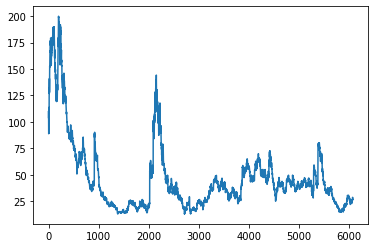

In [18]:
plt.plot(close_arr)
plt.show()

#### Plotting series (matplotlib)

In [19]:
close_series = aapl['Close']
type(close_series)

pandas.core.series.Series

/Users/MikaelaKlein/.venvs/venv_python_toolkit/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


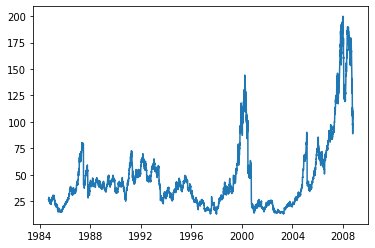

In [20]:
plt.plot(close_series)
plt.show()

#### Plotting Series (pandas)

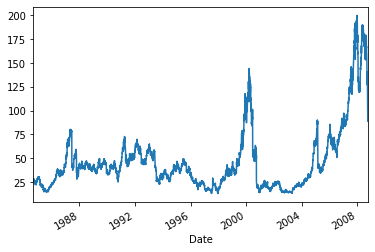

In [21]:
close_series.plot()
plt.show()

#### Plotting DataFrames (pandas)

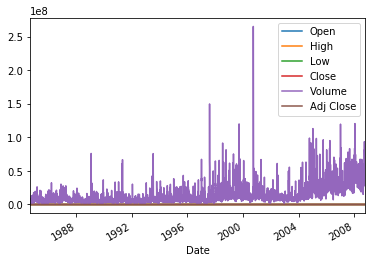

In [22]:
aapl.plot()  # plots all Series at once
plt.show()

#### Plotting DataFrames (matplotlib)

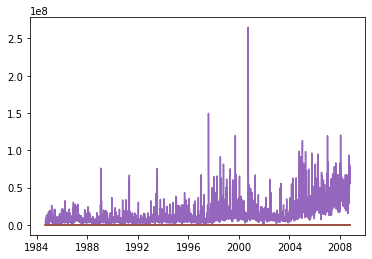

In [23]:
plt.plot(aapl)  #plots all columns at once
plt.show()

#### Fixing scales

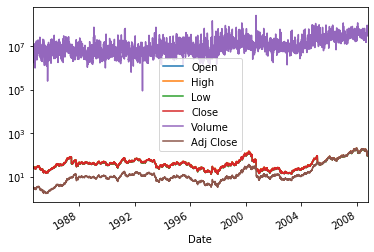

In [24]:
aapl.plot()
plt.yscale('log')  # logarithmic scaled on vertical axis
plt.show()

#### Customizing plots

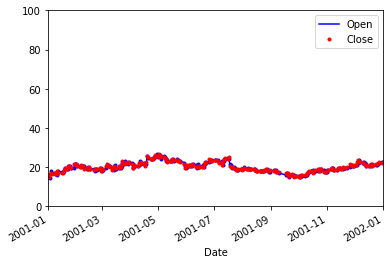

In [25]:
aapl['Open'].plot(color = 'b', style = '.-', legend = True)
aapl['Close'].plot(color = 'r', style = '.', legend = True)
plt.axis(('2001', '2002', 0, 100))
plt.show()

#### Saving plots

In [ ]:
aapl.loc[:, ['Open', 'Close', 'High', 'Low']].plot()
plt.savefig('aapl.png')
plt.savefig('aapl.pdf')
plt.show()